# Calculating Option Greeks using Black-Scholes Model

## Overview
This notebook provides a comprehensive implementation of the Black-Scholes option pricing model, demonstrating the calculation of key option Greeks. Option Greeks are sensitivity measurements that describe how the price of an option changes in response to various factors.

## Key Components
- Option Pricing
- Delta Calculation
- Gamma Calculation
- Vega Calculation
- Theta Calculation
- Rho Calculation

## Required Libraries

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Model Parameters

In [2]:
r = 0.055        # Risk-free interest rate
S = 600          # Current stock price
K = 600          # Strike price
T = 365 / 365    # Time to expiration (in years)
sigma = 0.1625   # Volatility

K_range = np.linspace(400, 800, 500)  # Strike prices from 400 to 800

## Black-Scholes Option Pricing Function

In [3]:
def blackScholes(r, S, K, T, sigma, type="c"):
    """
    Calculate the theoretical price of a call or put option using Black-Scholes model
    
    Parameters:
    - r: Risk-free interest rate
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration (in years)
    - sigma: Volatility of the underlying asset
    - type: Option type - 'c' for Call, 'p' for Put
    
    Returns:
    - Theoretical option price
    """
    # Calculate d1 and d2 parameters
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    try:
        if type == "c":
            # Call option pricing formula
            price = S * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1)
        elif type == "p":
            # Put option pricing formula
            price = K * np.exp(-r * T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

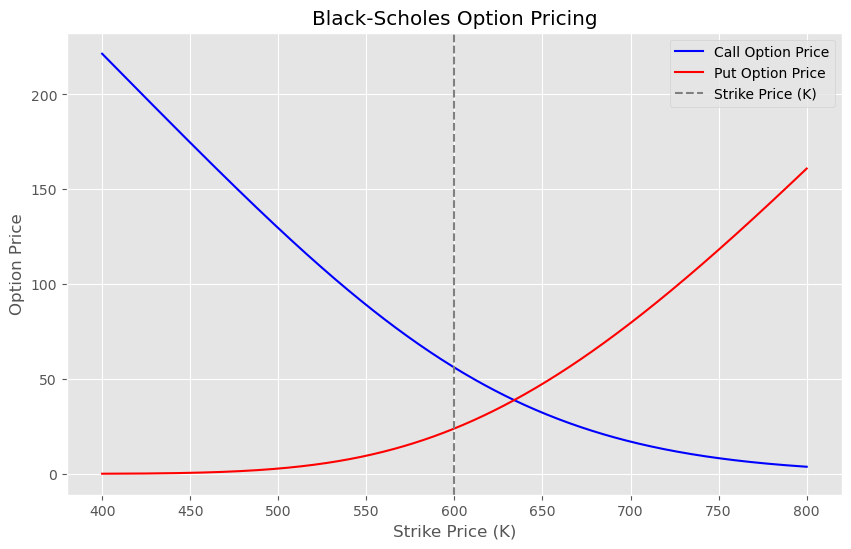

In [4]:
# Calculate call and put option prices
call_prices = [blackScholes(r, S, K, T, sigma, type="c") for K in K_range]
put_prices = [blackScholes(r, S, K, T, sigma, type="p") for K in K_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, call_prices, label="Call Option Price", color="blue")
plt.plot(K_range, put_prices, label="Put Option Price", color="red")
plt.axvline(x=K, color="gray", linestyle="--", label="Strike Price (K)")
plt.title("Black-Scholes Option Pricing")
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price")
plt.legend()
plt.show()

## Option Greeks Calculation Functions

### Delta
Delta measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price.

$$\Delta = \frac{\partial V}{\partial S}$$

$$\Delta_{call} = \Phi(d1)$$

$$\Delta_{put} = -\Phi(-d1)$$

In [5]:
def delta_calc(r, S, K, T, sigma, type="c"):
    """
    Calculate Delta: Rate of change of option price with respect to underlying asset price
    
    Delta represents the hedge ratio or the equivalent stock position of the option
    - For calls: Ranges from 0 to 1
    - For puts: Ranges from -1 to 0
    
    Parameters same as Black-Scholes function
    
    Returns:
    - Delta value
    """
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")


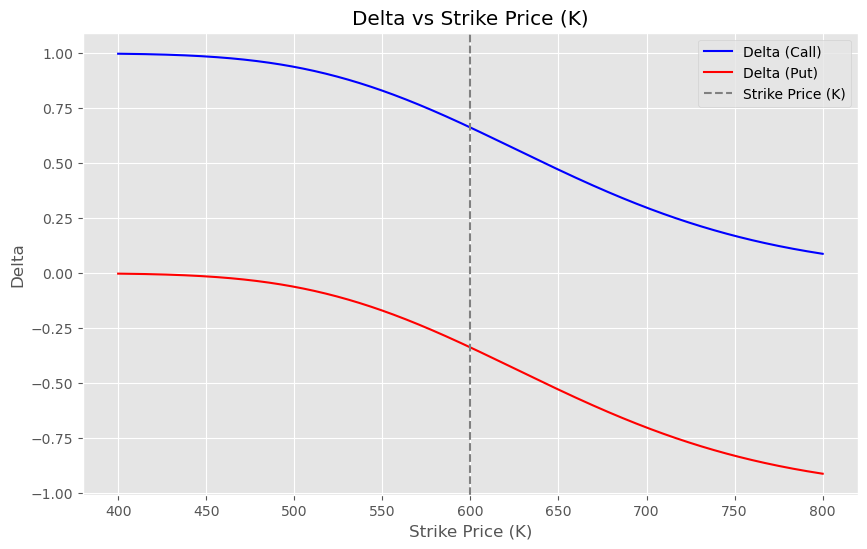

In [6]:
# Calculate Delta values for calls and puts
call_deltas = [delta_calc(r, S, K, T, sigma, type="c") for K in K_range]
put_deltas = [delta_calc(r, S, K, T, sigma, type="p") for K in K_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, call_deltas, label="Delta (Call)", color="blue")
plt.plot(K_range, put_deltas, label="Delta (Put)", color="red")
plt.axvline(x=K, color="gray", linestyle="--", label="Strike Price (K)")
plt.title("Delta vs Strike Price (K)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Delta")
plt.legend()
plt.show()

### Gamma
Gamma measures the rate of change in the delta with respect to changes in the underlying price.

$$\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}$$

$$\Gamma = \frac{\phi(d1)}{S\sigma\sqrt{\tau}}$$

In [7]:
def gamma_calc(r, S, K, T, sigma, type="c"):
    """
    Calculate Gamma: Rate of change of Delta with respect to underlying asset price
    
    Gamma measures the curvature of the option price's relationship to the underlying price
    - Highest near the money
    - Symmetric for calls and puts
    
    Parameters same as Black-Scholes function
    
    Returns:
    - Gamma value
    """
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    try:
        gamma_calc = norm.pdf(d1, 0, 1) / (S * sigma * np.sqrt(T))
        return gamma_calc
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

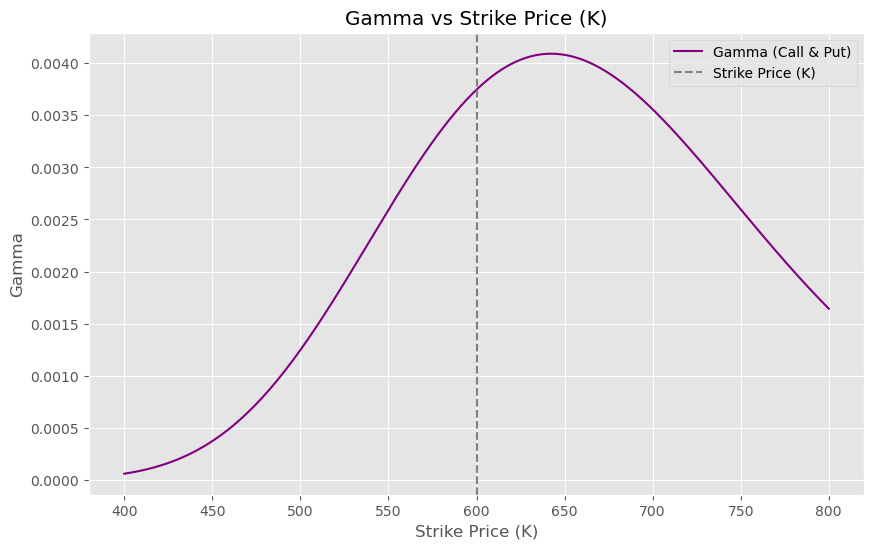

In [8]:
# Calculate Gamma values for the stock price range
gamma_values = [gamma_calc(r, S, K, T, sigma) for K in K_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, gamma_values, label="Gamma (Call & Put)", color="purple")
plt.axvline(x=K, color="gray", linestyle="--", label="Strike Price (K)")
plt.title("Gamma vs Strike Price (K)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Gamma")
plt.legend()
plt.show()

### Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

$$\upsilon = \frac{\partial V}{\partial \sigma}$$

$$\upsilon = S\phi(d1)\sqrt{\tau}$$

In [9]:
def vega_calc(r, S, K, T, sigma, type="c"):
    """
    Calculate Vega: Sensitivity of option price to volatility changes
    
    Vega measures how much an option's price changes with volatility
    - Highest for at-the-money options
    - Multiplied by 0.01 to represent percentage point change
    
    Parameters same as Black-Scholes function
    
    Returns:
    - Vega value
    """
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    try:
        vega_calc = S * norm.pdf(d1, 0, 1) * np.sqrt(T)
        return vega_calc * 0.01  # Convert to percentage points
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

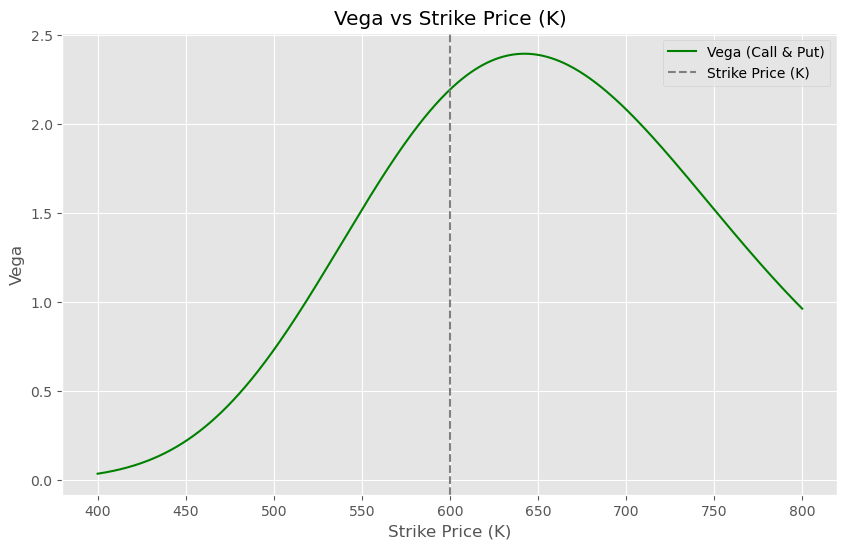

In [10]:
# Calculate Vega values for the stock price range
vega_values = [vega_calc(r, S, K, T, sigma) for K in K_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, vega_values, label="Vega (Call & Put)", color="green")
plt.axvline(x=K, color="gray", linestyle="--", label="Strike Price (K)")
plt.title("Vega vs Strike Price (K)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Vega")
plt.legend()
plt.show()

### Theta
Theta measures the sensitivity of the value of the derivative to the passage of time - time decay.

$$\Theta = -\frac{\partial V}{\partial \tau}$$

$$\Theta_{call} = -\frac{S\phi(d1)\sigma}{2\tau} - rK\exp{(-rT)}\Phi(d2)$$

$$\Theta_{put} = -\frac{S\phi(d1)\sigma}{2\tau} + rK\exp{(-rT)}\Phi(-d2)$$

In [11]:
def theta_calc(r, S, K, T, sigma, type="c"):
    """
    Calculate Theta: Rate of time decay of the option
    
    Theta measures how much value an option loses as time passes
    - Typically negative (option loses value as expiration approaches)
    - Divided by 365 to get daily time decay
    
    Parameters same as Black-Scholes function
    
    Returns:
    - Theta value (daily time decay)
    """
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S * norm.pdf(d1, 0, 1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S * norm.pdf(d1, 0, 1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2, 0, 1)
        return theta_calc / 365  # Daily time decay
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

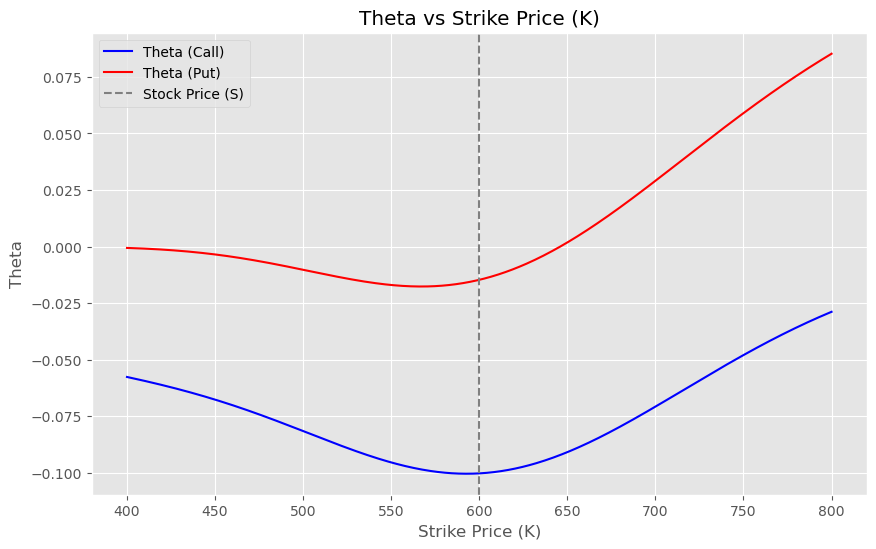

In [12]:
# Calculate Theta values for the strike price range
theta_values_call = [theta_calc(r, S, K, T, sigma, type="c") for K in K_range]
theta_values_put = [theta_calc(r, S, K, T, sigma, type="p") for K in K_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, theta_values_call, label="Theta (Call)", color="blue")
plt.plot(K_range, theta_values_put, label="Theta (Put)", color="red")
plt.axvline(x=S, color="gray", linestyle="--", label="Stock Price (S)")
plt.title("Theta vs Strike Price (K)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Theta")
plt.legend()
plt.show()

### Rho
Rho measures the sensitivity to the interest rate.

$$\rho = \frac{\partial V}{\partial r}$$

$$\rho_{call} = K\tau\exp{(-rT)}\Phi(d2)$$

$$\rho_{put} = -K\tau\exp{(-rT)}\Phi(-d2)$$

In [13]:
def rho_calc(r, S, K, T, sigma, type="c"):
    """
    Calculate Rho: Sensitivity of option price to interest rate changes
    
    Rho measures how much an option's price changes with interest rates
    - Multiplied by 0.01 to represent percentage point change
    
    Parameters same as Black-Scholes function
    
    Returns:
    - Rho value
    """
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K * T * np.exp(-r * T) * norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K * T * np.exp(-r * T) * norm.cdf(-d2, 0, 1)
        return rho_calc * 0.01  # Convert to percentage points
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

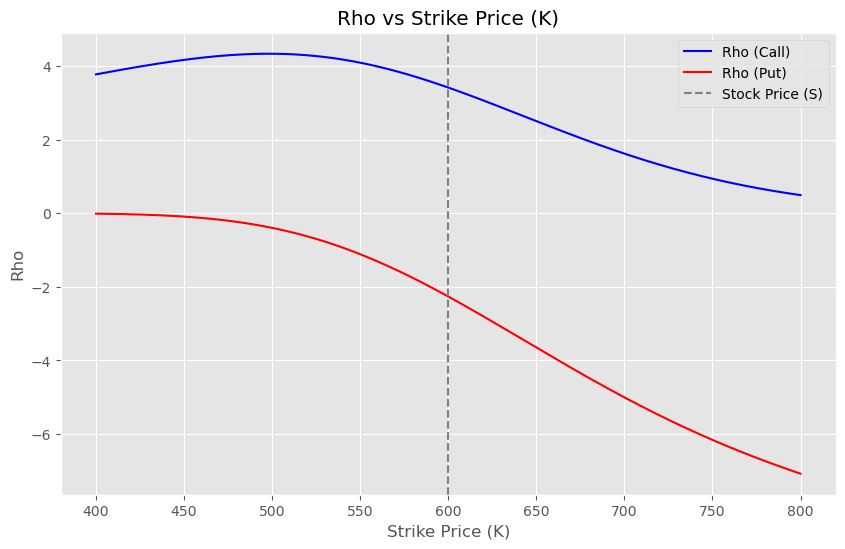

In [14]:
# Calculate Rho values for the strike price range
rho_values_call = [rho_calc(r, S, K, T, sigma, type="c") for K in K_range]
rho_values_put = [rho_calc(r, S, K, T, sigma, type="p") for K in K_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_range, rho_values_call, label="Rho (Call)", color="blue")
plt.plot(K_range, rho_values_put, label="Rho (Put)", color="red")
plt.axvline(x=S, color="gray", linestyle="--", label="Stock Price (S)")
plt.title("Rho vs Strike Price (K)")
plt.xlabel("Strike Price (K)")
plt.ylabel("Rho")
plt.legend()
plt.show()

## Comprehensive Option Greeks Calculation

In [15]:
# Option type selection
option_type = "p"  # Put option in this example

# Calculate and print all Greeks
print("Option Type: ", "Put" if option_type == "p" else "Call")
print("      Price: ", round(blackScholes(r, S, K, T, sigma, option_type), 3))
print("      Delta: ", round(delta_calc(r, S, K, T, sigma, option_type), 3))
print("      Gamma: ", round(gamma_calc(r, S, K, T, sigma, option_type), 3))
print("      Vega : ", round(vega_calc(r, S, K, T, sigma, option_type), 3))
print("      Theta: ", round(theta_calc(r, S, K, T, sigma, option_type), 3))
print("      Rho  : ", round(rho_calc(r, S, K, T, sigma, option_type), 3))

Option Type:  Put
      Price:  23.9
      Delta:  -0.337
      Gamma:  0.004
      Vega :  2.192
      Theta:  -0.015
      Rho  :  -2.263


## Additional Notes
- This implementation uses the standard Black-Scholes model assumptions
- Assumes European-style options
- Does not account for dividends
- Requires further validation for real-world trading

## References
- Black, F., & Scholes, M. (1973). The Pricing of Options and Corporate Liabilities
- Hull, J. C. (2017). Options, Futures, and Other Derivatives